In [12]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('../../data/ST001937_AN003150.csv')

Dropping not needed columns and renaming the Phenotypes column to labels

In [13]:
df = df.drop(['Sample ID', 'RAW_FILE_NAME'], axis=1)
df['Phenotypes'] = df['Phenotypes'].apply(lambda x: 0 if x == 'Healthy Controls' else 1 if x == 'Maligant SPNS' else 2)

Filling missing values with the mean

In [14]:
df.fillna(df.mean(), inplace=True)

Performing SVM linear classification and plotting the results

Accuracy:  0.7413793103448276


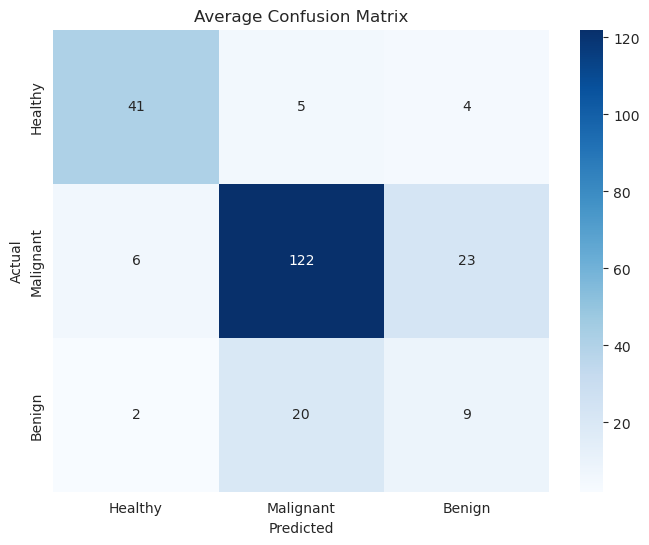

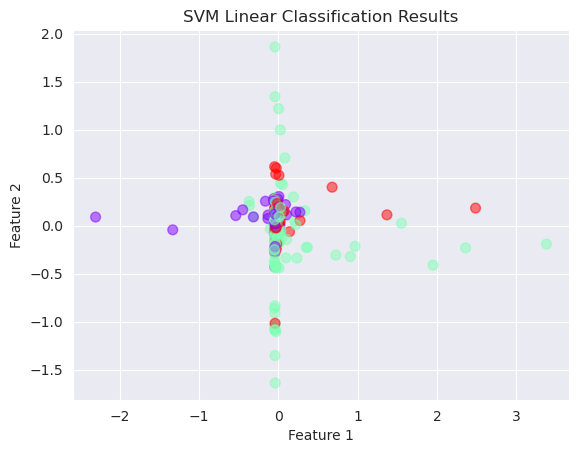

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Separating features and target variable
X = df.drop('Phenotypes', axis=1)
y = df['Phenotypes']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM linear classification
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print("Accuracy: ", accuracy)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="g", cmap="Blues", xticklabels=['Healthy', 'Malignant', 'Benign'], yticklabels=['Healthy', 'Malignant', 'Benign'])
plt.title("Average Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plotting the results
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=50, alpha=0.5, cmap='rainbow')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Linear Classification Results')
plt.show()